# Linear Methods for Classification

## Introduction

 * Since our predictor $G(x)$ takes values in a discrete set $G$, we can always divide the input space into a collection of regions labeled according to the classification.

 * The boundaries of these regions can be rough or smooth, depending on the prediction
function. For the current model  these decision boundaries are *linear*.

* Suppose there are $K$ classes, labeled $1, 2, ..., K$, and the fitted linear model for the $k^{th}$ indicator response variable is $\hat{f}_k(x) = \hat{β}_{k0} + \hat{β}_k^T x.$, That mean we compute $\hat{\beta}_0$ and $\hat{\beta}^T$ for each class. Here $x = (x_1, ..., x_d)$.

* The decision boundary between class $k$ and $l$ is that set of points for which $\hat{f}_k(x) = \hat{f}_l(x)$, that is, the set ${x : (\hat{β}_{k0} − \hat{β}_{l0}) + (\hat{β}_k − \hat{β}_l)^T x = 0}$, an affine set or *hyperplane*.

* Above approach is a member of *discriminant functions* $δ_k(x)$, which classify $x$ to the class with the largest value for its discriminant function.

* The other approach, is that model the posterior probabilities $Pr(G = k|X = x)$. Like a Logit, $P(G = k| X =x) = \frac{e^z}{1 + e^z}$, where $z = B_{k0} + B_{k1}x$. We can compute *log-oods* $log(\frac{Pr(G = k|X = x)}{1 -Pr(G = k|X = x)}) = z = B_{k0} + B_{k1}^{T}x $. The decision boundary is defined by $\{x|β_{k0} + β_{k1}^T x = 0 \}$, this since, we usually fix like a threshold $p=50\%$, so this result in $z=0$ like a threshold

* The decision in both is linear *hyperplane*.

* The methods that explicitly look for "separating hyperplanes." are two. The first is the wellknown *perceptron* model of Rosenblatt (1958), with an algorithm that finds a separating hyperplane in the training data, if one exists. 
* The second method, due to Vapnik (1996), finds an optimally separating hyperplane if one exists, else finds a hyperplane that minimizes some measure of overlap in the training data.

<div align = "center">
  <img src = "assets/lin_model_class/Captura_lin_for_class_01.PNG" />  
</div>

If we use only $X_1, X_2, ..., X_p$ like a features, the boundary decision is the left but if we add other combination of features like $X_1*X_2, ... ,$ or $X_1^2,X_2^2, ..$  the boundary decision is like right.

## Linear Discriminant Analysis

Let $k = 1, 2, ..., K$ be the labels to classes and Suppose $f(x|G=k) = f_k(x)$ is the density function conditioned to $G=k$ and let $π_k$ be the prior probability of class $k$, with $\sum_{k=1}^{K} π_k = 1$.

Bayes Theorem  gives us:

$$Pr(G = k|X = x) = \frac{f_k(x)π_k} {f(x)} = \frac{f_k(x)π_k} {\sum_{l=1}^{K}f_l(x)\pi_l} $$

This is a valid, since $\sum_{k=1}^{K} Pr(G=k|X=x) = 1$, we only need to put $\frac{f_k(x)\pi_k}{\sum f_l(x)\pi_l}$ instead $Pr(G=k|X=x)$.

As we can see we use density function $f_k$ instead probability function $Pr(X=x|G=k)$

Suppose that we model each class density as multivariate Gaussian:

$$f_k(x) = \frac{1 }{(2π)^{p/2}|Σ_k|^{1/2}} e^{−1/2(x−µ_k)^T Σ_k^{-1}(x−µ_k)}$$
Linear discriminant analysis (LDA) arises in the special case when we assume that the classes have a common covariance matrix $Σ_k = Σ_{∀k}$.

In comparing two classes $k$ and $ℓ$ it is sufficient to look at the log-ratio.

$$log \frac{Pr(G = k|X = x)}{Pr(G = ℓ|X = x)} = log{f_k(x)} + log{π_k} - (log{f_ℓ(x)} + log{π_ℓ})$$


To compute the hyperplane $log{f_k(x)} + log{π_k} -  (log{f_ℓ(x)} + log{π_ℓ}) = 0$. This means $log{f_k(x)} + log{π_k} = log{f_ℓ(x)} + log{π_ℓ}$. 

As we can see we can use one of them to compute the hyperplane. So we choose $log{f_k(x)} + log{π_k}$, this is the linear discriminant function $δ_k(x)$

$$δ_k(x) = x^TΣ^{−1}µ_k − \frac{1}{2}µ_k^T Σ^{−1} µ_k + log π_k$$

An equivalent description of the decision rule, with $G(x) = \arg\max_k{δ_k}(x)$.

This function $δ_k(x)$ is linear in $x$, so all the decision boundaries are linear.

<div align = "center">
    <img src = "assets/lin_model_class/Captura_lin_for_class_02.PNG" />
</div>

In practice we do not know the parameters of the Gaussian distributions, and will need to estimate them using our training data:
    
  * $\hat{π}_k = N_k/N$, where $N_k$ is the number of class-k observations
  * $\hat{µ}_k = \sum_{g_i=k}^{N} x_i/N_k$
  * $\hat{Σ} = \sum_{k = 1}^{K} \sum_{g_i = k}(x_i − \hat{µ}_k)(x_i − \hat{µ}_k)^T /(N − K)$

If $δ_k(x)>δ_l(x)$ The LDA rule classifies to class $k$

If the $Σ_k$ are not assumed to be equal, then the convenient cancellations in do not occur. 
In particular the pieces quadratic in $x$ remain. We then get *quadratic discriminant functions (QDA)*

$δ_k(x) = −\frac{1}{2} log|Σ_k| − \frac{1}{2}(x − µ_k)^T Σ_{k}^{−1}(x − µ_k) + log π_k$

The decision boundary between each pair of classes $k$ and $l$ is described by a quadratic equation $\{x : δ_k(x) = δ_ℓ(x)\}$

<div align = "center">
    <img src = "assets/lin_model_class/Captura_lin_for_class_03.PNG" />
</div>

* The left plot shows the quadratic decision boundaries obtained using LDA
in the five-dimensional space $X_1, X_2, X_1X_2, X_{1}^{2}, X_2^2$.

* The The right plot shows the quadratic decision boundaries found by QDA in 2-dimentional space $X_1, X_2$
* The differences are generallysmall but QDA is the preferred approach

### Regularized Discriminant Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
from sklearn import model_selection, metrics
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [3]:
# Load the data
data_drime = pd.read_stata(r'data_dta/CRIME1.dta')

# Generate the variable arr86, where a person is labeled equal to 0, if he has not committed a crime in 1986
# otherwise 1.
data_drime['arr86'] = data_drime.narr86.where(data_drime.narr86==0, 1)

# Selecting the features and target
features= ['pcnv', 'avgsen', 'tottime', 'ptime86', 'qemp86']
target = 'arr86'

X = np.array(data_drime[features])

# Generate polynomial and interaction features
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=X_poly.shape[1])
X_trans = pca.fit_transform(X_poly)
condition = pca.explained_variance_ratio_.cumsum() <= 0.997
X_pca = X_trans[:,condition]

y = np.array(data_drime[target])

# Split the data to train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_pca, y, random_state=123, test_size=0.25)

In [4]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

# svd: Singular value decomposition (default). 
# Does not compute the covariance matrix, 
# therefore this solver is recommended for data with a large number of features.

LinearDiscriminantAnalysis()

In [46]:
from assets.lin_model_class import utils_metrics

In [24]:
utils_metrics.assessment(y_test, X_test, clf)
utils_metrics.prob_cond_pred(y_test, X_test, clf)
utils_metrics.prob_cond_out(y_test, X_test, clf)

The accuracy 0.7273
Initial AUC value is 0.4515

Probability Conditioned on Predicts
> P(not committed a crime|low risk)   72.97%
> P(not committed a crime|high risk)  60.00%
> P(committed a crime|low risk)       27.03%
> P(committed a crime|high risk)      40.00%

Probability Conditioned on Outcomes
> P(low risk|not committed a crime)   99.40%
> P(high risk|not committed a crime)  0.60%
> P(low risk|committed a crime)       98.92%
> P(high risk|committed a crime)      1.08%




#### Cross - Validation for LDA

In [9]:
fit_to_grid_cv = model_selection.GridSearchCV(

    estimator=LinearDiscriminantAnalysis(
        solver='lsqr'),
    scoring= 'roc_auc',
    cv=5,
    param_grid={
        'shrinkage': np.linspace(0,1, 10)},
    verbose=False,
    return_train_score=True
)

fit_to_grid_cv.fit(X_train, y_train)

clf = LinearDiscriminantAnalysis(solver='lsqr', **fit_to_grid_cv.best_params_)
clf.fit(X_train, y_train)

utils_metrics.assessment(y_test, X_test, clf)
utils_metrics.prob_cond_pred(y_test, X_test, clf)
utils_metrics.prob_cond_out(y_test, X_test, clf)

The accuracy 0.7273
Initial AUC value is 0.4515

Probability Conditioned on Predicts
> P(not committed a crime|low risk)   72.97%
> P(not committed a crime|high risk)  60.00%
> P(committed a crime|low risk)       27.03%
> P(committed a crime|high risk)      40.00%

Probability Conditioned on Outcomes
> P(low risk|not committed a crime)   99.40%
> P(high risk|not committed a crime)  0.60%
> P(low risk|committed a crime)       98.92%
> P(high risk|committed a crime)      1.08%



In [110]:
X = np.array(data_drime[features])

# standrization
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)

y = np.array(data_drime[target])

# Split the data to train and test
X_train, X_test, y_train, y_test = model_selection .train_test_split(X_trans, y, random_state=123, test_size=0.25)

In [111]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np

clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [25]:
utils_metrics.assessment(y_test, X_test, clf)
utils_metrics.prob_cond_pred(y_test, X_test, clf)
utils_metrics.prob_cond_out(y_test, X_test, clf)

The accuracy 0.7273
Initial AUC value is 0.4515

Probability Conditioned on Predicts
> P(not committed a crime|low risk)   72.97%
> P(not committed a crime|high risk)  60.00%
> P(committed a crime|low risk)       27.03%
> P(committed a crime|high risk)      40.00%

Probability Conditioned on Outcomes
> P(low risk|not committed a crime)   99.40%
> P(high risk|not committed a crime)  0.60%
> P(low risk|committed a crime)       98.92%
> P(high risk|committed a crime)      1.08%



## Logistic Regression

The logistic regression model arises from the desire to model the posterior probabilities of the $K$ classes via linear functions in $B$, while at the same time ensuring that they sum to one and remain in $[0, 1]$. The model has
the form:



$$Pr(G = k|X = x) = \frac{\exp(β_{k0} + β_{k}^Tx)}{1 + \sum_{ℓ=1}^{K-1} \exp(β_{ℓ0} + β_{ℓ}^T x)} , k = 1,..., K - 1$$

$$Pr(G = K|X = x) = \frac{1}{1 + \sum_{ℓ=1}^{K-1} \exp(β_{ℓ0} + β_{ℓ}^T x)}$$

* The model can be specified in terms of $K − 1$ log-odds or logit transformations
* Although the model uses the last class as the denominator in the odds-ratios, the choice of denominator is arbitrary.

$$log \frac{Pr(G = 1|X = x)}{Pr(G = K|X = x)} = β_{10} + β_{1}^T x$$

$$log \frac{Pr(G = 2|X = x)}{Pr(G = K|X = x)} = β_{20} + β_{2}^T x$$

$$ ... $$

$$log \frac{Pr(G = K - 1|X = x)}{Pr(G = K|X = x)} = β_{(K - 1)0} + β_{(K- 1)}^T x$$

To emphasize the dependence on the entire parameter set $θ = \{β_{10}, β_{1}^T , ... , β_{(K−1)0}, β_{K−1}^T \}$, we denote the probabilities $Pr(G = k|X = x) = p_k(x; θ)$.

### Fitting Logistic Regression Models

If $K = 2$ the model is of binary response.

$$Pr(G = 1|X = x) = \frac{\exp(β_{10} + β_{1}^Tx)}{1 + \exp(β_{10} + β_{1}^T x)}$$

$$Pr(G = 2|X = x) = \frac{1}{1 + \exp(β_{10} + β_{1}^T x)}$$

Here we can note only we need one of these equations, since, if we find, $Pr(G=2|X=x)$, automatically we can compute $Pr(G=1|X=x)$.


The ecuation, $Pr(G = 1|X = x) = \frac{1}{1 + \exp(-(β_{10} + β_{1}^T x))}$ incorpore the *sigmoid function*, $\sigma(z)=1/( 1 + \exp(-z)$ , with $z = β_{10} + β_{1}^T x$. This take real values and map it to range [0, 1], so it create the probability

> Sigmoid Function
> 
> $$\sigma(z)=1/( 1 + \exp(-z))$$
>
> The sigmoid function (named because it looks like an s) is also called the *logistic function*, and gives logistic regression its name. 

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

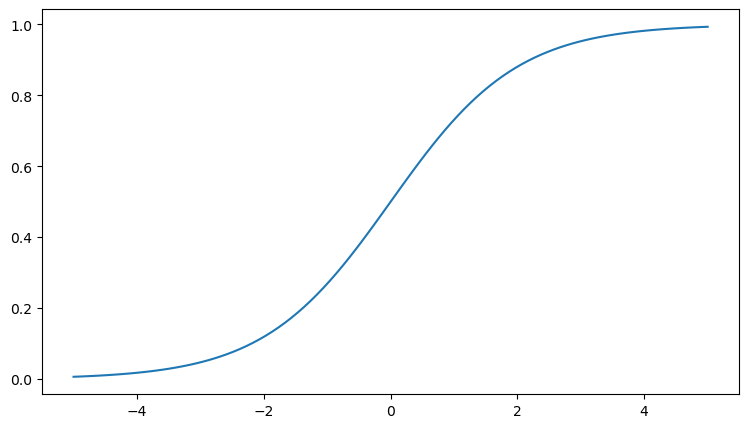

In [9]:
fig, ax = plt.subplots(figsize = (5, 3))

x_grid = np.linspace(-5, 5, 100)
f = lambda x:1/(1 + np.exp(-x))
ax.plot(x_grid, f(x_grid));

When we work with two classes is usually better work with $0/1$ response $y$. 

Suppose that, in actually the classes are instead $1 \rightarrow \text{no enrolled}$, $2 \rightarrow \text{enrolled}$

So  $ y = 1 $ if $i$ is $\text{enrolled}$ and $y = 0$ if $i$ is $\text{no enrolled}$

Let be the probabilities $Pr(G = k|X = x) = p_k(x; θ)$.

Let $p(x; θ) = p_{\text{enrolled}}(x; θ) = Pr(G = \text{enrolled}|X = x)$, and $p_{\text{no enrolled}}(x; θ) = 1 − p(x; θ) = Pr(G = \text{no enrolled}|X = x)$. This means that $y$ ~ $\text{Bern}(p(x; θ))$.

$$p_{k}(x;\theta)= p(x;\theta)^{y}\;(1-p(x;\theta))^{(1 - y)}$$

Where $p_{k}(x;\theta)$ is $PMF$ of $y$

Pugging in likehood usig the $N$ samples

$$l(\theta) = \sum_{i=1}^{N}log \;p(x_i;\theta)^{y_i}\;(1-p(x_i;\theta))^{(1 - y_i)} $$

$$l(\theta) = \sum_{i=1}^{N} y_i\; log \;p(x_i;\theta) + (1 - y_i)\;log(1-p(x_i;\theta)) $$

In term of $\log(\text{odds}) = -(β_{10} + β_{1}^T x)$

$$l(\theta) = \sum_{i=1}^{N} -y_i \log(odds) + log(1 + e^{\log(odds)} )$$

and its derivative for a sample is  $\frac{\partial l}{\partial log(odds)} = -y + \frac{e^{log(odds)}}{ 1 + e^{log(odds)}}$. Recall,  $ \frac{e^{log(odds)}}{ 1 + e^{log(odds)}} = p$, so the derivative can be rewritten like $\frac{\partial(l (y, \log(odds)))}{\partial \log(odds)} =-y  + p$

Let $\theta = \{β_{10} + β_{1}\}$ be

$ \frac{\partial \log(\text{odds})}{\partial β_{1}^T}  = -x$

$\frac{\partial Ll}{\partial log(odds)} . \frac{\partial \log(\text{odds})}{\partial β_{1}^T} = (-y +p)-x = x(y - p)$


To find the coeficients we can use the  *Rapson Newton method* on gradient of $L$ or *Gradient Decent* 

$$\frac{\partial l(\theta)}{\partial β_{1}^T} = \sum_{i=1}^{N} x_i\; (y_i - p(x_i;\theta))  = 0$$

$$\frac{\partial l(\theta)}{\partial β_{10}} = \sum_{i=1}^{N}(y_i - p(x_i;\theta))  = 0$$

For *Rapson New Method*

$${\beta_{1}^T}_{new} = {\beta_{1}^T}_{old} - \frac{\partial \partial l(\theta)}{\partial \beta_{1}^T \partial \beta_{1}^T}^{-1} \frac{\partial l(\theta)}{\partial \beta_{1}^T}$$

$${\beta_{10}}_{new} = {\beta_{10}}_{old} - \frac{\partial \partial l(\theta)}{\partial \beta_{10} \partial \beta_{10}}^{-1} \frac{\partial l(\theta)}{\partial \beta_{10}}$$

> The negative of this is called *negative log likehood* or *Cross Entropy* at level of record.
> 
> $$L(y, p)=-[y\log(p) + (1-y)\log(1-p)]$$
> 
> And it is used in neural network like a loss function for binary response in classification model. A general version of this is 
> 
> $$L(\textbf{y}, \textbf{p})=-\sum_{k=1}^{K}y_k\log(p_k)$$
> 
>An example:
> $\textbf{p} = [0.1, 0.1, 0.6, 0.2]$ and $\textbf{y}=[0, 0, 1, 0]$ the cross entropy would be $0.5108$. Validated with torch CrossEntropyLoss. This package take as inputs the *logits*, internally it coonvert to probabilities and then compute the cross entropy loss

> Logistic regression models are usually fitted by maximum likelihood.
> 
> The log likelihood can be derived by defining, for each individual, $d_{ik} = 1$ if alternative $k$ is chosen by individual $i$, and $0$ if not, for the $K - 1$ possible outcomes. Then, for each $i$, one and only one of the $d_{ik}’s$ is $1$.
>
> Recall the *conditional probabilities* are *probabilities* and the maximun likelihood maximize the conditional probabilities $Pr(g_i=k|x=x_i)$ given the $\theta$ parameters
>
> <!-- $$L(\theta) = p_k(x; θ)  = \prod_{i=1}^{N} \prod_{k=1}^{K-1}p_{g_i}(x_i;\theta) $$ -->
> <!-- $$L(\theta)  = \prod_{i=1}^{N} \prod_{k=1}^{K} d_{ik} Pr(g_i = k|X = x_i; θ) $$ -->
> $$l(\theta) = \sum_{i=1}^{N}\sum_{k=1}^{K} d_{ik} log \;p_{g_i}(x_i;\theta) $$
> where $p_{g_i}(x_i; θ) = Pr(g_i = k|X = x_i; θ)$. The probability of the $i^{th}$ record belong to class $k$

### Gradient Descent

The goal is with *gradient descent* find optimal parameters, parameters that minimize the *loss function* on all train examples. 

$\theta = (\beta_{10}, \beta_{1}^{T})$

$$\hat{\theta}=\arg\min_{\theta} \frac{1}{N} \sum_{i=1}^{N} L(y_i, p(\textbf{x}_i;\theta))$$

Gradient descent is a method that finds a minimum of a function by figuring out in which direction (in the space of the parameters $\theta$) the function’s slope is rising, and moving in the opposite direction.

For logistic regression, this loss function is conveniently convex. A **convex** function has at most one minimum; there are no local minima to get stuck in, so *gradient descent* starting from any point is guaranteed to find the minimum.


> By contrast, the loss for multi-layer neural networks is non-convex, and gradient descent may
> get stuck in local minima for neural network training and never find the global optimum.

The parameters are updated following the following rule

$$ \theta_{t} =\theta_{t-1} - \alpha \nabla L(y, p(\textbf{x};\theta)) $$

Where $\alpha$ is *learning rate* and $\nabla L(y, p(\textbf{x};\theta))$ is the gradient for all parameters $\theta$ that is represented by partial derivative of $L(y, p(\textbf{x};\theta))$ 

$$ \nabla L(y, p(\textbf{x};\theta)) = \begin{bmatrix}
\frac{\partial L}{\partial B_{10}} \\
\frac{\partial L}{\partial B_{11}} \\

... \\

\frac{\partial L}{\partial B_{1D}}
\end{bmatrix}$$

To see how its works, we can think the partial derivatives like slope. If the slope is negative for a $\beta$, the $\beta$ must be updated positively $+$ (in opposite direction). Why?

<center>

<img src = ".\assets\lin_model_class\gradient_descent.png" height = 300>

</center>

If the slope is negative it means that we can minimize the loss function increasing the $\beta$

Instead using the log likelihood, we will use the negative log likelihood (cross-entropy) to update the parameters ($\theta$) in the logistic model (binomial). so instead maximize, we will minimize it.


$$ L(y, p(\textbf{x};\theta)) = - [y\; log \;p(\textbf{x};\theta) + (1 - y)\;log(1-p(\textbf{x};\theta))] $$

For the second feature

$$\frac{ \partial L(y, p(\textbf{x};\theta))}{\partial \beta_{2}} = -(y-\hat{y}) x_{2} $$


The Stochastic Gradient Descent Algorithm

Stochastic gradient descent is an online algorithm that minimizes the loss function
by computing its gradient after each training example, and nudging q in the right
direction (the opposite direction of the gradient). (An “online algorithm” is one that
processes its input example by example, rather than waiting until it sees the entire
input.

Function *STOCHASTIC GRADIENT DESCENT*($ L(), f (), x, y$) returns $\theta$

where: $L$ is the loss function
- $f$ is a function parameterized by $\theta$
- $\textbf{x}$ is the set of training inputs $x_1, x_2, ..., x_N$
- $y$ is the set of training outputs (labels) $y_1, y_2, ..., y_N$

$\theta = 0$

**repeat** until done # see caption

For each training tuple $(\textbf{x}_i, y_i)$ (in random order)
1. Optional (for reporting): # How are we doing on this tuple?
  - Compute $\hat{y}_i = p(\textbf{x}_i; \theta$) # What is our estimated output $\hat{y}_i$?
  - Compute the loss $L(\hat{y}_i, y_i)$ # How far off is $\hat{y}_i$ from the true output $y_i$?
2. $g = \nabla L(y, p(\textbf{x};\theta))$ # How should we move q to maximize loss?
3. $\theta_{t} =\theta_{t-1} - \alpha g $ # Go the other way instead

**return** $\theta$

The *learning rate* $\alpha$ is a **hyperparameter** that must be adjusted. If it’s too high,
the learner will take steps that are too large, overshooting the minimum of the loss
function. If it’s too low, the learner will take steps that are too small, and take too
long to get to the minimum. 

It is common to start with a higher learning rate and then
slowly decrease it, so that it is a function of the iteration k of training; the notation
hk can be used to mean the value of the learning rate at iteration k

Stochastic gradient descent is called stochastic because it chooses a single random
example at a time, moving the weights so as to improve performance on that single
example.

it’s common to compute the gradient over batches of training instances rather than a single instance

In *batch training* we compute the gradient over the entire dataset.

In *mini-batch training*: we train on a group of $m$ examples (perhaps 512, or 1024) that is less than the whole dataset

In [124]:
import numpy as np
import pandas as pd
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt

In [131]:
unif = uniform()
e = norm()
size = 700
random_state = 123

In [132]:
data = pd.DataFrame({'A':unif.rvs(size, random_state),
                     'B':unif.rvs(size, 2*random_state)})

In [133]:
data['y'] = 8*data['A'] + 2*data['B'] + e.rvs(size, random_state)

In [134]:
epochs = 10
ca, cb = 0, 0
alpha = 0.01

while epochs>0:

    data_random = data.sample(frac=1, random_state=epochs)
    data_splits = np.array_split(data_random, 100)
    
    while data_splits:        
        data_current = data_splits.pop()
        y_current = data_current['y'].copy()
        y_hat = ca*data_current['A'] + cb*data_current['B']
        la = -(y_current - y_hat)*data_current['A']
        lb = -(y_current - y_hat)*data_current['B']
        ca, cb = ca - alpha*np.sum(la), cb - alpha*np.sum(lb)
    epochs-=1

ca, cb

(7.821120803194643, 2.127896076708602)

### Regularization

There is a problem with learning weights that make the model perfectly match the
training data. If a feature is perfectly predictive of the outcome because it happens
to only occur in one class, it will be assigned a very high weight. 

The weights for
features will attempt to perfectly fit details of the training set, in fact too perfectly,
modeling noisy factors that just accidentally correlate with the class. This problem is
called overfitting. A good model should be able to generalize well from the training data to the unseen test set, but a model that overfits will have poor generalization

To avoid overfitting, a new **regularization** term $R(\theta)$ is added to the objective function (*likelihood*) instead loss function. Why? we can undenstand better.


$$ \hat{\theta} = \arg \max_{\theta}  \sum_{i=1}^{S}  y_i\; log \;p(x_i;\theta) + (1 - y_i)\;log(1-p(x_i;\theta)) - R(\theta)$$

Where $S$ is the size of the *mini-batch*

This penalty is particularly useful in the $p \gt N$ situation, or any situation where there are many correlated predictor variables

There are two ways to compute this regularization term. 


- **L2** *regularization*  $R(\theta) = \sum_{d=1}^{D} \beta_{d}^2$. 

  - *Ridge regression* is known to shrink the coefficients of correlated predictors towards each
other, allowing them to borrow strength from each other. In the extreme case of k identical
predictors, they each get identical coefficients with 1/kth the size that any single one would
get if fit alone
  
- **L1** *regularization*  $R(\theta) = \sum_{d=1}^{D} |\beta_{d}|$
  - *Lasso*, on the other hand, is somewhat indifferent to very correlated predictors, and will tend
to pick one and ignore the rest.
  - If we fit $y = f(X, \beta)$ where $f(X, \beta) = \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \epsilon$ and $x_1 = x_2=x_3$ perfectly correlated one each other, then *coefficient Lasso* would fit to: $f(X, \hat{\beta}) = \hat{\beta}_{1}x_1 + 0x_2 + 0x_3 $

In [1]:
import ssl
from io import StringIO
import urllib
import re
from sklearn.linear_model import LinearRegression, Lasso

## Model Evaluation

**Accuracy**

The common way to evaluate a model is using accuracy, the $%$ of correct prediction

We usually assign $1$ to positive response that something that we need to know. Is is span? Does she like me?

$$\text{Yes}:1, \text{No}:0$$

*Confusion Matrix*

It is a table for visualizing how an algorithm performs with respect to the human gold labels, using two dimensions (system output and gold labels), and each cell labeling a set of possible outcomes

<center>

<img src = ".\assets\lin_model_class\confusion_matrix.png" height = 300>

</center>

$$\text{Precision} = \frac{TP}{FP + TP} $$

$$\text{Recall} = \frac{TP}{FN + TP} $$

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

$\text{F-Measure}$ is a simple combination of Precision and Recall. It is a harmony mean weighted by the importance of them. If both are important $\alpha = 0.5$

$$F = (\frac{1}{\alpha \frac{1}{P} +  (1-\alpha)\frac{1}{R} })$$

### Decision Boundary

How do we make a decision about which class to apply to a test instance x? For
a given x, we say yes if the probability P(y = 1jx) is more than .5, and no otherwise.
boundary decision We call .5 the decision boundary

$$\text{If} \: \hat{P}(g = 1|x) \ge 0.5 \: \text{then} \: 1\: \text{otherwise} \: 0 $$

If we assign $1$ when  $\hat{P}(g = 1|x) \ge 0.5$  then $0.5$ is boundary decision.



The decision boundary can be changed (increase the threshold) with the goal to improve *precision*, but the *recall* will suffer. Will apply false to some true cases that had a model output just below the raised threshold.

A way to visualize this trade-off with *ROC* curve.

Here appear the concept of *ROC* and *AUC*

The *ROC* curve traces the relationship between the *false positive rate*  - *[FP/(TN + TP)]*  (on the $x$ axis) and the *true positive rate* - *[TP/(FN + TP)]* (on the $y$ axis) as the probability threshold $p$ is changed.

If we increase the threshold in order to improve precision [TP/(TP + FP)], then (TP + FP) the number of records with positive prediction  decrece since we are assing 1 to record with higher probability. The TP decrece as well, but the decrecing of (TP + FP) is strong growth. The result: *increasing precision*. The *false positive rate* decreace as well, since we are assing 1 to record with higher probability to be positive and we are keeping with these. The consecuence of this action is decresing in *true positive rate*. Again, this happend since we are assing 1 to record with higher positive probability, the quantity of records that over the new threshold usually are smaller than one with small threshold.

<div align = "center">
<img src="https://upload.wikimedia.org/wikipedia/commons/1/13/Roc_curve.svg" height = "400">
</div>

Source: https://en.wikipedia.org/wiki/Receiver_operating_characteristic

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
from sklearn import model_selection, metrics
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
import re
from io import StringIO

In Binary Choice Model, the response is a *binary variable*. This variable can be make it based on a quantitative variable (using bining) or in actually can be a binary response $0$ (spam) and $1$ (no spam).

In econometrics *binary variable* hides an choice, this choice is based on *Utility* of this choice 

Dataset extracted from: https://pages.stern.nyu.edu/~wgreene/Text/Edition7/tablelist8new.htm

In [293]:
with open(r'assets\lin_model_class\pages.stern.nyu.edu_~wgreene_Text_Edition7_TableF5-1.txt') as table_5:
    data = table_5.read()
    data_info = re.search(r'([\*].+?(?=\*\/))\*\/\n(.+)', data, re.DOTALL).group(1)
    data_cleaned = re.search(r'([\*].+?(?=\*\/))\*\/\n(.+)', data, re.DOTALL).group(2)
    data_formatted = re.sub(r'[ ]+', r',', data_cleaned)
    data_consol = pd.read_csv(StringIO(data_formatted), sep=',')

In [294]:
print(data_info)

*
doc LFP  "A dummy variable = 1 if woman worked in 1975, else 0";
doc WHRS "Wife's hours of work in 1975";
doc KL6  "Number of children less than 6 years old in household";
doc K618 "Number of children between ages 6 and 18 in household";
doc WA   "Wife's age";
doc WE   "Wife's educational attainment, in years";
doc WW   "Wife's average hourly earnings, in 1975 dollars";
doc RPWG "Wife's wage reported at the time of the 1976 interview\
 (not the same as the 1975 estimated wage).\
 To use the subsample with this wage, one needs to select 1975\
 workers with LFP=1, then select only those women with non-zero RPWG.\
 Only 325 women work in 1975 and have a non-zero RPWG in 1976.";
doc HHRS "Husband's hours worked in 1975";
doc HA   "Husband's age";
doc HE   "Husband's educational attainment, in years";
doc HW   "Husband's wage, in 1975 dollars";
doc FAMINC "Family income, in 1975 dollars.\
 This variable is used to construct the property income variable.";
doc MTR  "This is the marginal ta

In [295]:
import h2o
from h2o.estimators import H2OGeneralizedLinearEstimator

In [296]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM JBR-11.0.13.7-1751.21-jcef (build 11.0.13+7-b1751.21, mixed mode)
  Starting server from C:\Users\caima\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\caima\AppData\Local\Temp\tmpmja0rchn
  JVM stdout: C:\Users\caima\AppData\Local\Temp\tmpmja0rchn\h2o_caima_started_from_python.out
  JVM stderr: C:\Users\caima\AppData\Local\Temp\tmpmja0rchn\h2o_caima_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Bogota
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,"3 years, 5 months and 27 days !!!"
H2O_cluster_name:,H2O_from_python_caima_jto53b
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.926 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"accepting new members, healthy"


In [297]:
data_frame = h2o.H2OFrame(data_consol)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [314]:
response = 'LFP'
numerical_feats = ["WA", "WE", "HHRS", "HA", "HE", "HW", "WMED", "WFED", "UN", "AX"]
categorical_feats = ["KL6", "K618", "CIT"]

In [315]:
data_frame[response] = data_frame[response].asfactor()
data_frame[numerical_feats] = data_frame[numerical_feats].asnumeric()
data_frame[categorical_feats] = data_frame[categorical_feats].asfactor()

In [316]:
train, valid, test = data_frame.split_frame(
    ratios = [0.6, 0.2],
    seed = 1234
)

In [301]:
print(data_info)

*
doc LFP  "A dummy variable = 1 if woman worked in 1975, else 0";
doc WHRS "Wife's hours of work in 1975";
doc KL6  "Number of children less than 6 years old in household";
doc K618 "Number of children between ages 6 and 18 in household";
doc WA   "Wife's age";
doc WE   "Wife's educational attainment, in years";
doc WW   "Wife's average hourly earnings, in 1975 dollars";
doc RPWG "Wife's wage reported at the time of the 1976 interview\
 (not the same as the 1975 estimated wage).\
 To use the subsample with this wage, one needs to select 1975\
 workers with LFP=1, then select only those women with non-zero RPWG.\
 Only 325 women work in 1975 and have a non-zero RPWG in 1976.";
doc HHRS "Husband's hours worked in 1975";
doc HA   "Husband's age";
doc HE   "Husband's educational attainment, in years";
doc HW   "Husband's wage, in 1975 dollars";
doc FAMINC "Family income, in 1975 dollars.\
 This variable is used to construct the property income variable.";
doc MTR  "This is the marginal ta

### Explaining Models with Partial Effects

$$\frac{\partial Pr(G=1|X=x)}{\partial X_{d}} = Pr(G=1|X=x) ( 1 - Pr(G=1|X=x)) \beta_{d}$$

*Average Partial Effect* (APE) 

If the feature *d* is not dummy

$$ APE = \frac{1}{n} \sum_{i=1}^{n} \frac{\partial Pr(G=1|X=x_i)}{\partial X_{d}}$$


but, if the feature *d* is dummy

$$ APE = \frac{1}{n} \sum_{i=1}^{n} [Pr(G=1|X=x_{i,d}, x_d=1) - Pr(G=1|X = x_{i,d}, x_d=0)]$$

Where $x_{i,d}$ means all features except $d$

Odds

It is defined like $Odds = P(G=1|X=x)/P(G=0|X=x)$. 

For logistic $$P(G=1|X=x)/P(G=0|X=x) = \exp(\beta^{T}{x})$$

The effect of change a variable dummy on odds. *Odds Ratio*

$$Odds \: Ratio = \frac{Odds(x_d=1)}{Odds(x_d=0 )} = \exp(\beta_{d})$$ 

In [348]:
logit_model = H2OGeneralizedLinearEstimator(
    family = 'binomial', 
    link = 'Logit',
    compute_p_values= True,
    # Specify if the intercept should be estimated or not
    intercept = True,
    # lambda_ controls the amount of regularization applied to the model.
    lambda_ = 0,
    # alpha = 0 controls the distribution between the ℓ1 [α]
    # (LASSO) and ℓ2 [α -1] (ridge regression) penalties
    # if α=1, Lasso, α = 0, Ridge
    alpha = 1,
    # Specify whether to automatically remove collinear columns during model-building.
    #remove_collinear_columns = False,
    solver = 'IRLSM',
    #seed = 1234)
)

In [349]:
logit_model.train(x=numerical_feats + categorical_feats, 
                  y = response, 
                  training_frame = data_frame,
                  validation_frame=valid)

glm Model Build progress: |

███████████████████████████████████████████████| 100%


In [358]:
logit_model.model_performance(test)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.18289410470707004
RMSE: 0.4276612031819932
LogLoss: 0.5395201397908074
Null degrees of freedom: 152
Residual degrees of freedom: 130
Null deviance: 213.61636782004203
Residual deviance: 165.09316277598705
AIC: 211.09316277598705
AUC: 0.8072186110160794
AUCPR: 0.8256290179944596
Gini: 0.6144372220321588

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5836558570900445: 


,,0,1,Error,Rate
0,0,53.0,21.0,0.2838,(21.0/74.0)
1,1,18.0,61.0,0.2278,(18.0/79.0)
2,Total,71.0,82.0,0.2549,(39.0/153.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.583656,0.757764,81.0
1,max f2,0.212131,0.864745,134.0
2,max f0point5,0.772923,0.784314,43.0
3,max accuracy,0.601834,0.745098,73.0
4,max precision,0.972718,1.000000,0.0
5,max recall,0.119228,1.000000,144.0
6,max specificity,0.972718,1.000000,0.0
7,max absolute_mcc,0.772923,0.499336,43.0
8,max min_per_class_accuracy,0.588075,0.743243,77.0
9,max mean_per_class_accuracy,0.601834,0.745895,73.0



Gains/Lift Table: Avg response rate: 51.63 %, avg score: 37.79 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.013072,0.639338,0.968354,0.968354,0.500000,0.676793,0.500000,0.676793,0.012658,0.012658,-3.164557,-3.164557
1,,2,0.026144,0.594426,0.968354,0.968354,0.500000,0.600844,0.500000,0.638818,0.012658,0.025316,-3.164557,-3.164557
2,,3,0.032680,0.586369,0.000000,0.774684,0.000000,0.590882,0.400000,0.629231,0.000000,0.025316,-100.000000,-22.531646
3,,4,0.045752,0.568982,0.968354,0.830018,0.500000,0.575920,0.428571,0.614000,0.012658,0.037975,-3.164557,-16.998192
4,,5,0.052288,0.566186,1.936709,0.968354,1.000000,0.568569,0.500000,0.608321,0.012658,0.050633,93.670886,-3.164557
5,,6,0.104575,0.541213,0.242089,0.605222,0.125000,0.555786,0.312500,0.582053,0.012658,0.063291,-75.791139,-39.477848
6,,7,0.150327,0.480997,1.106691,0.757843,0.571429,0.509726,0.391304,0.560041,0.050633,0.113924,10.669078,-24.215740
7,,8,0.202614,0.430170,1.210443,0.874643,0.625000,0.455192,0.451613,0.532983,0.063291,0.177215,21.044304,-12.535729
8,,9,0.300654,0.400928,0.774684,0.842047,0.400000,0.415778,0.434783,0.494764,0.075949,0.253165,-22.531646,-15.795267
9,,10,0.398693,0.370549,0.903797,0.857232,0.466667,0.385842,0.442623,0.467980,0.088608,0.341772,-9.620253,-14.276821


In [359]:
coefficients_table = logit_model._model_json['output']['coefficients_table']

In [360]:
coefficients_table_frame = coefficients_table.as_data_frame()

In [361]:
coefficients_table_frame.round(4)

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,2.5344,1.0200,2.4845,0.0130,0.6365
1,K618.1,-0.1613,0.2463,-0.6551,0.5124,-0.1613
2,K618.2,0.1576,0.2697,0.5844,0.5590,0.1576
3,K618.3,0.1879,0.3037,0.6186,0.5362,0.1879
4,K618.4,0.0734,0.4733,0.1550,0.8768,0.0734
5,K618.5,0.8141,0.6780,1.2009,0.2298,0.8141
6,K618.6,-8.2713,167.0575,-0.0495,0.9605,-8.2713
7,K618.7,-11.2847,167.0571,-0.0676,0.9461,-11.2847
8,K618.8,8.2326,166.5827,0.0494,0.9606,8.2326
9,KL6.1,-1.5073,0.2620,-5.7523,0.0000,-1.5073


In [334]:
logit_model._model_json["output"]['model_summary']


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,None,22,22,9,py_10_sid_96c0


In [5]:
# Load the data
data_drime = pd.read_stata(r'data_dta/CRIME1.dta')

# Generate the variable arr86, where a person is labeled equal to 0, if he has not committed a crime in 1986
# otherwise 1.
data_drime['arr86'] = data_drime.narr86.where(data_drime.narr86==0, 1)

# Selecting the features and target
features= ['pcnv', 'avgsen', 'tottime', 'ptime86', 'qemp86']
target = 'arr86'

X = np.array(data_drime[features])

# Generate polynomial and interaction features
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

pca = PCA(n_components=X_poly.shape[1])
X_trans = pca.fit_transform(X_poly)
condition = pca.explained_variance_ratio_.cumsum() <= 0.997
X_pca = X_trans[:,condition]

y = np.array(data_drime[target])

# Split the data to train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_pca, y, random_state=123, test_size=0.25)

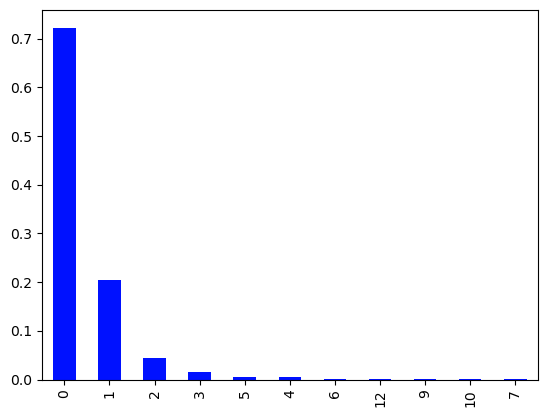

In [21]:
data_drime.narr86.value_counts(normalize=True).plot(kind='bar', color='#0011ff')

#### Avoiding Harms in Classification

In [1]:
import numpy as np

In [14]:
np.sum(-1*(np.array([0.1, 0.9])*np.log(np.array([0.9, 0.1]))))

2.0828626352604234

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import model_selection, metrics
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score

In [ ]:
# Load the data
data_drime = pd.read_stata(r'data_dta/CRIME1.dta')

# Generate the variable arr86, where a person is labeled equal to 0, if he has not committed a crime in 1986
# otherwise 1.
data_drime['arr86'] = data_drime.narr86.where(data_drime.narr86==0, 1)

# Selecting the features and target
features= ['pcnv', 'avgsen', 'tottime', 'ptime86', 'qemp86']
target = 'arr86'

X = np.array(data_drime[features])
y = np.array(data_drime[target])

X_norm = (X - X.mean(axis=0, keepdims=True))/X.std(axis=0, keepdims=True)

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                X_norm, y, test_size=0.25)
logit_model = LogisticRegression(solver='newton-cg')
logit_model.fit(X_train, y_train)

In [48]:
utils_metrics.assessment(y_test, X_test, logit_model)
utils_metrics.prob_cond_pred(y_test, X_test, logit_model)
utils_metrics.prob_cond_out(y_test, X_test, logit_model)

The accuracy 0.7243
Initial AUC value is 0.6703

Probability Conditioned on Predicts
> P(not committed a crime|low risk)   72.32%
> P(not committed a crime|high risk)  20.00%
> P(committed a crime|low risk)       27.68%
> P(committed a crime|high risk)      80.00%

Probability Conditioned on Outcomes
> P(low risk|not committed a crime)   99.59%
> P(high risk|not committed a crime)  0.41%
> P(low risk|committed a crime)       95.88%
> P(high risk|committed a crime)      4.12%



## Cross Validation for Logit

In [20]:
from sklearn.pipeline import Pipeline

In [21]:
scaler = StandardScaler()

fit_to_grid_cv = model_selection.GridSearchCV(
    # estimator=Pipeline(steps=[("scaler", scaler),\
    #     ("logistic", LogisticRegression( class_weight="balanced",solver='liblinear'))]),
    estimator = LogisticRegression(solver='liblinear'),#  class_weight="balanced"
    scoring= 'roc_auc',
    cv=5,
    param_grid={
        'penalty': ["l1", "l2"],
        'C': np.linspace(0.1,1, 10)}, 
    verbose=False,
    return_train_score=True
)

fit_to_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='roc_auc', verbose=False)

In [23]:
logit_model = LogisticRegression(solver='liblinear', C=0.02, penalty="l2")
logit_model.fit(X_train, y_train)

utils_metrics.assessment(y_test, X_test, logit_model)
utils_metrics.prob_cond_pred(y_test, X_test, logit_model)
utils_metrics.prob_cond_out(y_test, X_test, logit_model)

The accuracy 0.7258
Initial AUC value is 0.4437

Probability Conditioned on Predicts
> P(not committed a crime|low risk)   72.93%
> P(not committed a crime|high risk)  66.67%
> P(committed a crime|low risk)       27.07%
> P(committed a crime|high risk)      33.33%

Probability Conditioned on Outcomes
> P(low risk|not committed a crime)   99.20%
> P(high risk|not committed a crime)  0.80%
> P(low risk|committed a crime)       98.92%
> P(high risk|committed a crime)      1.08%



### Statistical Significance Testing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import model_selection, metrics
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score

In [ ]:
# Load the data
data_drime = pd.read_stata(r'data_dta/CRIME1.dta')

# Generate the variable arr86, where a person is labeled equal to 0, if he has not committed a crime in 1986
# otherwise 1.
data_drime['arr86'] = data_drime.narr86.where(data_drime.narr86==0, 1)

# Selecting the features and target
features= ['pcnv', 'avgsen', 'tottime', 'ptime86', 'qemp86']
target = 'arr86'

X = np.array(data_drime[features])
y = np.array(data_drime[target])

The `old model` is defined by normalization on features and the `new model` is defined by the generation of the polynomios of the normalized features

In [ ]:
# [OLD MODEL] Normalization 
X_norm = (X - X.mean(axis=0, keepdims=True))/X.std(axis=0, keepdims=True)

# [NEW MODEL] Generating polynomial and interaction features 
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_norm)

In [ ]:
def f1_test_data_model(X:np.ndarray):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
                X, y, test_size=0.25)
    logit_model = LogisticRegression(solver='newton-cg')
    logit_model.fit(X_train, y_train)
    f1 = f1_score(y_test, logit_model.predict(X_test))
    return f1, y_test, X_test, logit_model

In [ ]:
f1_old, y_test_old, X_test_old, lm_old = f1_test_data_model(X_norm)
f1_new, y_test_new, X_test_new, lm_new = f1_test_data_model(X_poly)
δ_inint = f1_new - f1_old
print("\u03B4: ",δ_inint)

δ:  0.0861244019138756


The $\delta_\text{init}$ score was computed using $(y_{test}^{new}, X_{test}^{new})$ and $(y_{test}^{old}, X_{test}^{old})$
$$\delta_\text{init} = F_{1}^\text{new} - F_{1}^\text{old} = 0.077185$$

The hypothesis are $$H_0: \delta<=0$$ $$H_1: \delta>0$$

Given this dataset we resample it using *bootstrap technique*. This process will result in a distribution of $\delta$. With this distribution we can calculate the $\text{p-value}$ 

In [ ]:
def f1_score_by_idx_model(X, y, idx, model):
    predict = model.predict(X[idx,:])
    return f1_score(y, predict)

In [ ]:
# size of the dataset
size = len(X_test_new)
f1_score_boots = []
x = 0
while x < 1000:
    # resampling of the dataset with replacement
    idx = np.random.choice(range(size), size, replace=True)
    
    # compute the f_1 score having as an input the ressampling dataset
    f1_score_boots_new = f1_score_by_idx_model(X_test_new, y_test_new, idx, lm_new)
    f1_score_boots_old = f1_score_by_idx_model(X_test_old, y_test_old, idx, lm_old)
    f1_score_boots.append({
        'f1_score_boots_new': f1_score_boots_new,
        'f1_score_boots_old': f1_score_boots_old
    })
    x += 1


In [ ]:
# convert to dataframe
df_f1_score_boots = pd.DataFrame(f1_score_boots)
# calculate the δ
δ = df_f1_score_boots.eval('f1_score_boots_new - f1_score_boots_old')

The resampling was generate under $\delta_\text{init}>0$, but to compute the $\text{p-value}$ we need to keep as true the $h_0$, that is, $\delta<=0$, but $\delta_\text{init}$ point out the otherwise, so we need to transform (only by localization) the $\delta$ generade by resampling

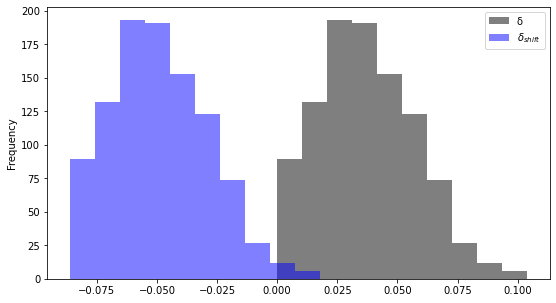

In [ ]:
fig, ax = plt.subplots(figsize = (9, 5))
δ.plot(kind='hist', ax =ax , color = 'k', alpha = 0.5, label = 'δ')
δ_shift = δ - δ_inint
δ_shift.plot(kind='hist', ax =ax, color = 'b', alpha = 0.5, label = r'$δ_{shift}$')
plt.legend()

In [ ]:
print("p-value: " ,f"{np.mean(δ_shift>δ_inint):.2%}")

p-value:  0.00%


with $\text{p-value}=0\%$  we can reject the null hypothesis and conclude new is better than old

Resources:

* The Elements of Statistical Learning Data Mining, Inference, and Prediction - Second Edition - Trevor Hastie - Robert Tibshirani - Jerome Friedman. Springer.

* Data Page: https://hastie.su.domains/ElemStatLearn/


# Multinomial Logitic Regression

We use *multinomial logistic regression*, also called *softmax regression* (in older NLP literature you will sometimes see the name *maxent classifier*)

The output of $\textbf{y}$ for each $X$ is a vector of lenght $K$, it is **one-hot vector** version of $y$, such as, $y$ can be classified in range from $1$ to $K$. It can take one and only one of these classes.

If $y$ belong to the $k$ class the **one-hot vector** will be $[0, 0, ..., 1, ..., 0]$ where $y_k=1$ and set all remaining elements of $\textbf{y}$ of zeros. 

The job of the classifier is produce an estimate vector $\hat{\textbf{{y}}}$, it is a vector of probabilities $[\hat{y}_{1},..., \hat{y}_{K} ]$.

This job in actually is done by *Softmax* function. This function map a vector $z=[z_1, z_2, ..., z_K]$ of values into distribution of probabilities. Each in a range $(0, 1)$ and all sum to $1$.



For a vector $\textbf{z}$ of dimensionality $K$, the softmax is defined as

$$ \text{softmax}(\textbf{z}) = [\frac{\exp(z_1)}{\sum_{k=1}^{K}\exp(z_k)}, \frac{\exp(z_2)}{\sum_{k=1}^{K}\exp(z_k)}, ..., \frac{\exp(z_K)}{\sum_{k=1}^{K}\exp(z_k)}]$$ 

In [2]:
import numpy as np

In [3]:
z = np.array([0.6,1.1,-1.5,1.2,3.2,-1.1])

In [7]:
def softmax(z:np.array):
    return np.exp(z)/np.sum(np.exp(z))    

In [11]:
softmax(z)

array([0.05482541, 0.09039182, 0.00671372, 0.09989841, 0.73815494,
       0.0100157 ])

Softmax can be applied in *Logistic Regression*. We only need to assign for each observation and the for $k^{th}$ category:

$$z_{k} = β_{k0} + β_{k}^T\textbf{x} $$


$$ \hat{y_k} =  P(y = k|\textbf{x}) = \frac{\exp(β_{k0} + β_{k}^T\textbf{x})}{\sum_{k=1}^{K} \exp{(β_{k0} + β_{k}^T\textbf{x})}}  $$

Where $ \hat{y_1} + \hat{y_2} + ... + \hat{y_K} = 1$

Features in Multinomial Logistic

Since there is a $\beta_0$ for each class, we need to evaluate the effect of this on eah class

We suppose $\beta_{2} = 4$ for the $k=1$, $\beta_{2} = -1$ for the $k=2$ and $\beta_{2} = 5.3$ for the $k=3$. Here $2$ means the second features, so we can say the second feature has a different effects on each class. e.g. the second feature increase the probability to belong to class $1$ (and to class $3$, but with more power), while the decrease the probability to belong to class $2$.  

### Cross Entropy 

Loss Function of Sofmax 

In *Maximum Likehood* the likehood (or log likehood) is maximized.

The requirement for a function is consired `loss function` is that this is minimized, so whe can multiply by `-`. So we get `negative log likehood` (called cross entropy) and this is the loss function for classification multiple categories.

The log likelihood can be derived by defining, for each individual, $d_{k} = 1$ if alternative $k^{th}$ is chosen by individual, and $0$ if not, for the $K - 1$ possible outcomes. Then, for each individual one and only one of the $d_{k}’s$ is $1$.

Recall the *conditional probabilities* are *probabilities* and the maximun likelihood maximize the conditional probabilities $p_{k} = P(y=k|\textbf{x};\theta)$ given the $\theta$ parameters. The probability of the individual choices to class $k$

$$L(\theta) = -\sum_{k=1}^{K} d_{k} log \;p_{k} $$

